In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
%matplotlib inline
import xarray as xr
import numpy as np
import os
from pprint import pprint
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy 
from datetime import datetime
import cmocean
import pandas as pd
import intake
import xarray
import xesmf as xe
import cftime
import xesmf as xe
import matplotlib.ticker as mticker
from cartopy.util          import add_cyclic_point
import matplotlib.path as mpath

In [24]:
ds_omon_01_rm = xr.open_dataset('ds_omon_01_rm.nc')
ds_omon_02_rm = xr.open_dataset('ds_omon_02_rm.nc')
ds_omon_03_rm = xr.open_dataset('ds_omon_03_rm.nc')
ds_omon_04_rm = xr.open_dataset('ds_omon_04_rm.nc')
ds_omon_05_rm = xr.open_dataset('ds_omon_05_rm.nc')
ds_omon_06_rm = xr.open_dataset('ds_omon_06_rm.nc')
ds_omon_07_rm = xr.open_dataset('ds_omon_07_rm.nc')
ds_omon_fa02_rm = xr.open_dataset('ds_omon_fa02_rm.nc')
ds_omon_fa03_rm = xr.open_dataset('ds_omon_fa03_rm.nc')
ds_omon_fas_rm = xr.open_dataset('ds_omon_fas_rm.nc')

ds_omon_pi_rm = xr.open_dataset('ds_omon_pi_rm.nc')
ds_omon_1p_rm = xr.open_dataset('ds_omon_1ppy_rm.nc')
ds_omon_fs_rm = xr.open_dataset('ds_omon_fafstress_rm.nc')

ds_amon_01_rm = xr.open_dataset('ds_amon_01_rm.nc')
ds_amon_02_rm = xr.open_dataset('ds_amon_02_rm.nc')
ds_amon_03_rm = xr.open_dataset('ds_amon_03_rm.nc')
ds_amon_04_rm = xr.open_dataset('ds_amon_04_rm.nc')
ds_amon_05_rm = xr.open_dataset('ds_amon_05_rm.nc')
ds_amon_06_rm = xr.open_dataset('ds_amon_06_rm.nc')
ds_amon_07_rm = xr.open_dataset('ds_amon_07_rm.nc')
ds_amon_fa02_rm = xr.open_dataset('ds_amon_fa02_rm.nc')
ds_amon_fa03_rm = xr.open_dataset('ds_amon_fa03_rm.nc')
ds_amon_fas_rm = xr.open_dataset('ds_amon_fas_rm.nc')

ds_amon_pi_rm = xr.open_dataset('ds_amon_pi_rm.nc')
ds_amon_1p_rm = xr.open_dataset('ds_amon_1ppy_rm.nc')
ds_amon_fs_rm = xr.open_dataset('ds_amon_fafstress_rm.nc')


ds_simon_pi_rm = xr.open_dataset('ds_simon_pi_rm.nc')
ds_simon_04_rm = xr.open_dataset('ds_simon_04_rm.nc')
ds_simon_fs_rm = xr.open_dataset('ds_simon_fs_rm.nc')
ds_simon_fas_rm = xr.open_dataset('ds_simon_fas_rm.nc')

In [25]:
ds_amon_fa02_rm.update({'time' : xr.cftime_range(start='1850-01-01', periods=1212, freq='M', calendar='noleap')})
ds_omon_fa02_rm.update({'time' : xr.cftime_range(start='1850-01-01', periods=1212, freq='M', calendar='noleap')})

ds_amon_fa03_rm.update({'time' : xr.cftime_range(start='1850-01-01', periods=1212, freq='M', calendar='noleap')})
ds_omon_fa03_rm.update({'time' : xr.cftime_range(start='1850-01-01', periods=1212, freq='M', calendar='noleap')})

ds_amon_fas_rm.update({'time' : xr.cftime_range(start='1850-01-01', periods=1212, freq='M', calendar='noleap')})
ds_omon_fas_rm.update({'time' : xr.cftime_range(start='1850-01-01', periods=1212, freq='M', calendar='noleap')})
ds_simon_fas_rm.update({'time' : xr.cftime_range(start='1850-01-01', periods=1212, freq='M', calendar='noleap')})

ds_amon_fs_rm.update({'time' : xr.cftime_range(start='1850-01-01', periods=1212, freq='M', calendar='noleap')})
ds_omon_fs_rm.update({'time' : xr.cftime_range(start='1850-01-01', periods=1212, freq='M', calendar='noleap')})
ds_simon_fs_rm.update({'time' : xr.cftime_range(start='1850-01-01', periods=1212, freq='M', calendar='noleap')})


<xarray.Dataset>
Dimensions:             (vertices: 4, lat: 180, lon: 360, member_id: 1, time: 1212)
Coordinates:
  * time                (time) object 1850-01-31 00:00:00 ... 1950-12-31 00:0...
    type                |S7 ...
  * member_id           (member_id) object 'r1i1p2f1'
  * lon                 (lon) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * lat                 (lat) float64 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (vertices, lat, lon) float64 ...
    vertices_longitude  (vertices, lat, lon) float64 ...
    siconc              (member_id, time, lat, lon) float64 ...
Attributes:
    regrid_method:  bilinear

In [ ]:
def sst_sss(ds_exp, ds_ctl):
    fig, (axl, axr) = plt.subplots(1,2, figsize=(14,6),subplot_kw=dict(projection=ccrs.Robinson(central_longitude=200)))

    (ds_exp.isel(lev=0).mean(dim='time') - 
     ds_ctl.isel(lev=0).mean(dim='time')).thetao.plot(ax=axl, transform=ccrs.PlateCarree(), 
                                                      cbar_kwargs=dict(shrink=0.5, label=r'$^{\circ}$C'), 
                                                      vmin=-2, vmax=2, cmap='RdBu_r')

    (ds_exp.isel(lev=0).mean(dim='time') - 
     ds_ctl.isel(lev=0).mean(dim='time')).so.plot(ax=axr, vmin=-1,vmax=1, 
                                                         cmap='RdBu_r', transform=ccrs.PlateCarree(), 
                                                         cbar_kwargs=dict(shrink=0.5, label=''))

    for ax in [axl, axr]:
        ax.coastlines()
        ax.add_feature(cfeature.LAND)
        ax.set_global()
        ax.set_title('')

In [ ]:
sst_sss(ds_omon_fas_rm.sel(time=slice('1921','1950')), ds_omon_fs_rm)
plt.savefig('sst_sss_fas-fs.png', bbox_inches='tight', dpi=300)

In [ ]:
sst_sss(ds_omon_04_rm.sel(time=slice('1921','1950')), ds_omon_pi_rm)
plt.savefig('sst_sss_04-pi.png', bbox_inches='tight', dpi=300)

In [4]:
def ts_sec(ds_exp, ds_ctl):
    fig, (axl, axr) = plt.subplots(1,2, figsize=(18,6), sharex=True, sharey=True)
    cmap = mpl.cm.get_cmap("RdBu_r").copy()
    cmap.set_bad([0.5,0.5,0.5])

    (ds_exp.sel(time=slice('1921','1950')).mean(dim='time').mean(dim='lon') - 
     ds_ctl.mean(dim='time').mean(dim='lon')).thetao.plot(ax=axl, cmap=cmap, vmin=-1, vmax=1)

    (ds_exp.sel(time=slice('1921','1950')).mean(dim='time').mean(dim='lon') - 
     ds_ctl.mean(dim='time').mean(dim='lon')).so.plot(ax=axr,vmin=-0.2, vmax=0.2,cmap=cmap)
    plt.gca().invert_yaxis()

In [ ]:
ts_sec(ds_omon_fas_rm.sel(member_id='r1i1p2f1'), ds_omon_fs_rm)
plt.savefig('ts_sec_fas-fs.png', bbox_inches='tight', dpi=300)

In [ ]:
ts_sec(ds_omon_fa02_rm.sel(member_id='r2i1p2f1'), ds_omon_fs_rm)
plt.savefig('ts_sec_fa02-fs.png', bbox_inches='tight', dpi=300)

In [ ]:
ts_sec(ds_omon_fa03_rm.sel(member_id='r3i1p2f1'), ds_omon_fs_rm)
plt.savefig('ts_sec_fa03-fs.png', bbox_inches='tight', dpi=300)

In [ ]:
ts_sec(ds_omon_04_rm.sel(member_id='r1i1p2f1'), ds_omon_pi_rm)
plt.savefig('ts_sec_04-pi.png', bbox_inches='tight', dpi=300)

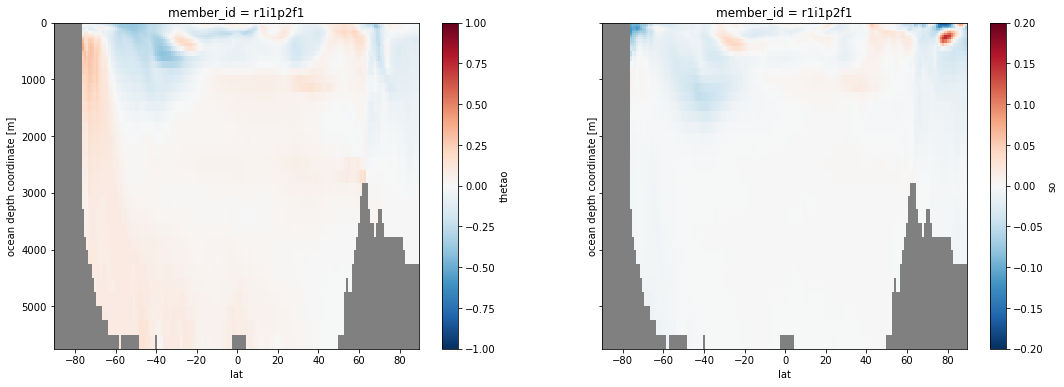

In [5]:
ts_sec(ds_omon_03_rm.sel(member_id='r1i1p2f1'), ds_omon_fs_rm)
plt.savefig('ts_sec_03-fs.png', bbox_inches='tight', dpi=300)

In [ ]:
ds_omon_03_rm

In [ ]:
def tas_pr_map(ds_exp, ds_ctl):
    fig, (axl, axr) = plt.subplots(1,2, figsize=(14,6), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=200)))
    ( ds_exp.sel(time=slice('1921','1950')).mean(dim='time') -
     ds_ctl.mean(dim='time')).tas.plot(ax=axl, transform=ccrs.PlateCarree(), cbar_kwargs=dict(shrink=0.5, label=r'$^{\circ}$C'))

    ( ds_exp.sel(time=slice('1921','1950')).mean(dim='time') -
     ds_ctl.mean(dim='time')).pr.plot(ax=axr, transform=ccrs.PlateCarree(), cbar_kwargs=dict(shrink=0.5))

    for ax in [axl, axr]:
        ax.coastlines()
        ax.add_feature(cfeature.LAND)
        ax.set_global()

In [ ]:
tas_pr_map(ds_amon_fas_rm, ds_amon_fs_rm)
plt.savefig('tas_pr_map_fas-fs.png', bbox_inches='tight', dpi=300)

In [ ]:
tas_pr_map(ds_amon_fa02_rm, ds_amon_fs_rm)
plt.savefig('tas_pr_map_fa02-fs.png', bbox_inches='tight', dpi=300)

In [ ]:
ds_force = xr.open_dataset('cmip6_fafmip_fwf01_ant_orca1.nc')
ds_mesh = xr.open_dataset('mesh_mask.nc')

In [ ]:
fig, axl = plt.subplots(1,1, figsize=(12,8),subplot_kw=dict(projection=ccrs.SouthPolarStereo(central_longitude=0,
                                                                                        )))

axl.set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())
d60s = np.ones((180,360))*0.00005
d60s[31::,:] = np.nan
df2 = ds_force.copy()
df2.where(df2.y>-60, np.nan)

#df3 = ds_mesh.tmask.isel(z=0).isel(t=0)
#df3.where(df3>0, np.nan)
ds3= ds_mesh.tmask.isel(z=0).isel(t=0).where(ds_mesh.tmask.isel(z=0).isel(t=0)==0)



axl.pcolormesh(np.arange(-180, 180), np.arange(-90,90), d60s, 
               transform=ccrs.PlateCarree(), cmap='cool', vmin=0, vmax=0.001)

axl.pcolormesh(ds_mesh.nav_lon, ds_mesh.nav_lat, ds3, 
               transform=ccrs.PlateCarree(), cmap='Greys', vmin=-1, vmax=1)

axl.pcolormesh(ds_force.nav_lon, ds_force.nav_lat, ds_force.water_flux_anom.isel(time=1), 
               transform=ccrs.PlateCarree(), cmap='Wistia', vmin=0, vmax=0.0001)

#axl.coastlines()
#axl.gridlines()
gl = axl.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.75, linestyle='--')

gl.xlocator = mticker.FixedLocator([])
gl.ylocator = mticker.FixedLocator([-60])

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axl.set_boundary(circle, transform=axl.transAxes)
fig.savefig('antwater_input_regions.png', bbox_inches='tight', dpi=300)

In [ ]:
fig, axl = plt.subplots(1,1, figsize=(12,8),subplot_kw=dict(projection=ccrs.SouthPolarStereo(central_longitude=0,
                                                                                        )))

axl.set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())
#d60s = np.ones((180,360))*0.00005
#d60s[31::,:] = np.nan
df2 = ds_force.copy()
df2.where(df2.y>-60, np.nan)

#df3 = ds_mesh.tmask.isel(z=0).isel(t=0)
#df3.where(df3>0, np.nan)
ds3= ds_mesh.tmask.isel(z=0).isel(t=0).where(ds_mesh.tmask.isel(z=0).isel(t=0)==0)



#axl.pcolormesh(np.arange(-180, 180), np.arange(-90,90), d60s, 
#               transform=ccrs.PlateCarree(), cmap='cool', vmin=0, vmax=0.001)

axl.pcolormesh(ds_mesh.nav_lon, ds_mesh.nav_lat, ds3, 
               transform=ccrs.PlateCarree(), cmap='Greys', vmin=-1, vmax=1)

axl.pcolormesh(ds_force.nav_lon, ds_force.nav_lat, ds_force.water_flux_anom.isel(time=1), 
               transform=ccrs.PlateCarree(), cmap='Wistia', vmin=0, vmax=0.0001)

#axl.coastlines()
#axl.gridlines()
gl = axl.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.75, linestyle='--')

gl.xlocator = mticker.FixedLocator([])
gl.ylocator = mticker.FixedLocator([-60])

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axl.set_boundary(circle, transform=axl.transAxes)
fig.savefig('antwater_input_region_1.png', bbox_inches='tight', dpi=300)

In [ ]:
ds_mesh.tmask.isel(z=0).isel(t=0).where(ds_mesh.tmask.isel(z=0).isel(t=0)==0).load().min()

In [54]:
cat_cmip6 = "/space/hall4/sitestore/eccc/crd/CMIP6/final/canesm_final.json"
col = intake.open_esm_datastore(cat_cmip6)

query = dict(variable_id=['friver', 'areacello'], table_id=['Omon', 'Ofx'], source_id=f'CanESM5', 
             experiment_id=['piControl', '1pctCO2'], member_id='r1i1p2f1')
cat = col.search(**query)

In [55]:
ds = cat.to_dataset_dict()
ds_friver = ds['CMIP.CCCma.CanESM5.piControl.Omon.gn']['friver']
ds_friver_1pppy = ds['CMIP.CCCma.CanESM5.1pctCO2.Omon.gn']['friver']
ds_areacello = ds['CMIP.CCCma.CanESM5.piControl.Ofx.gn']['areacello']


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


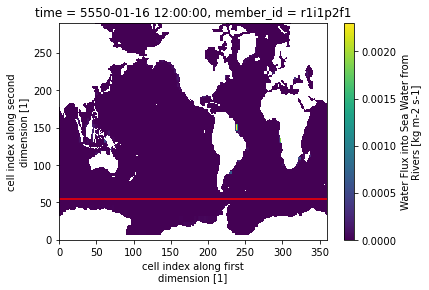

In [56]:
ds_friver.isel(time=0).plot()
plt.gca().axhline(55, color='r')

In [57]:
ds_m = (ds_friver * ds_areacello)
ds_m1 = (ds_friver_1pppy * ds_areacello)

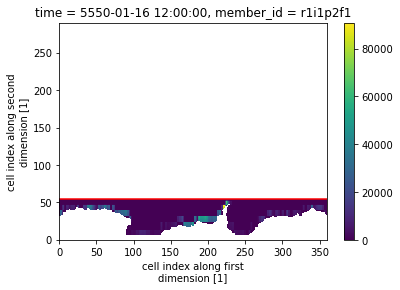

In [58]:
ds_m.isel(time=0).where(ds_m.j < 55).plot()
plt.gca().axhline(55, color='r')

/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


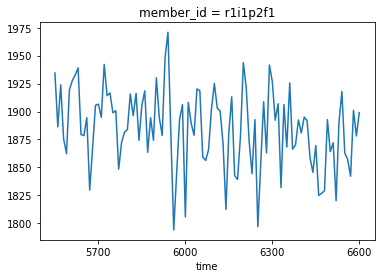

In [59]:
(ds_m.where(ds_m.j < 55).sum(dim=('i','j'))*3600*24*365/1e12).resample(time='10A').mean(dim='time').plot()

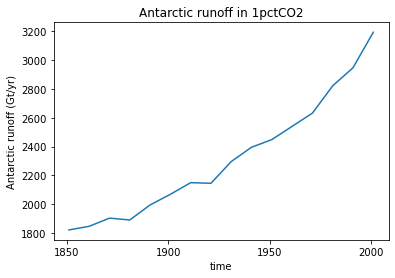

In [60]:
(ds_m1.where(ds_m1.j < 55).sum(dim=('i','j'))*3600*24*365/1e12).resample(time='10A').mean(dim='time').plot()
plt.ylabel('Antarctic runoff (Gt/yr)')
plt.title('Antarctic runoff in 1pctCO2')
plt.savefig('antarctic_runoff_1ppy.png', bbox_inches='tight', dpi=300)

In [61]:
query = dict(variable_id=['pr', 'evspsbl', 'areacella', 'sftlf'], table_id=['Amon', 'fx'], source_id=f'CanESM5', 
             experiment_id=['piControl', '1pctCO2'], member_id='r1i1p2f1')
cat = col.search(**query)

In [62]:
ds = cat.to_dataset_dict()
ds_pr = ds['CMIP.CCCma.CanESM5.piControl.Amon.gn']['pr']
ds_ev = ds['CMIP.CCCma.CanESM5.piControl.Amon.gn']['evspsbl']
ds_pr_1ppy = ds['CMIP.CCCma.CanESM5.1pctCO2.Amon.gn']['pr']
ds_ev_1ppy = ds['CMIP.CCCma.CanESM5.1pctCO2.Amon.gn']['evspsbl']
ds_areacella = ds['CMIP.CCCma.CanESM5.piControl.fx.gn']['areacella']
ds_sftlf = xr.open_dataset('~/cmip6_final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/fx/sftlf/gn/v20190429/sftlf_fx_CanESM5_piControl_r1i1p2f1_gn.nc')['sftlf']


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


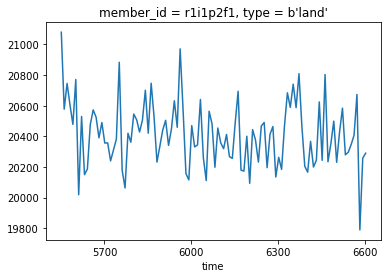

In [63]:
((ds_pr - ds_ev)*ds_areacella*3600*24*365/1e12).sel(lat=slice(-70,-50)).sum(dim=('lon', 'lat')).resample(time='10A').mean(dim='time').plot()

/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


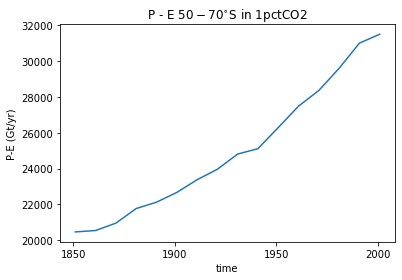

In [64]:
((ds_pr_1ppy - ds_ev_1ppy)*ds_areacella*3600*24*365/1e12
).sel(lat=slice(-70,-50)).sum(dim=('lon', 'lat')
                             ).resample(time='10A').mean(dim='time').plot()

plt.ylabel('P-E (Gt/yr)')
plt.title(r'P - E $50-70^{\circ}$S in 1pctCO2')
plt.savefig('so_p-e_1ppy.png', bbox_inches='tight', dpi=300)

/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


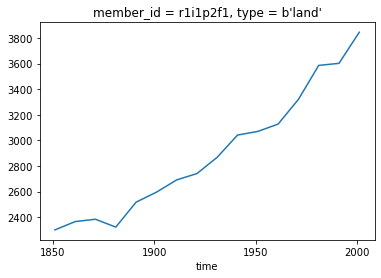

In [65]:
((ds_pr_1ppy - ds_ev_1ppy)*ds_areacella*3600*24*365/1e12
).sel(lat=slice(-90,-70)).sum(dim=('lon', 'lat')
                             ).resample(time='10A').mean(dim='time').plot()

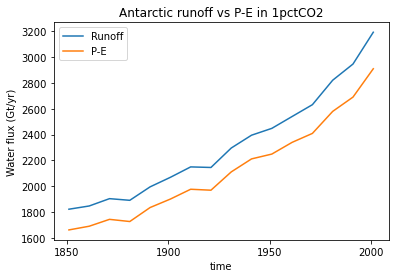

In [71]:
(ds_m1.where(ds_m1.j < 55).sum(dim=('i','j'))*3600*24*365/1e12).resample(time='10A').mean(dim='time').plot(label='Runoff')

((ds_pr_1ppy - ds_ev_1ppy)*ds_areacella*ds_sftlf/100*3600*24*365/1e12
).sel(lat=slice(-90,-60)).sum(dim=('lon', 'lat')
                             ).resample(time='10A').mean(dim='time').plot(label='P-E')

plt.ylabel('Water flux (Gt/yr)')
plt.title('Antarctic runoff vs P-E in 1pctCO2')
plt.legend()
plt.savefig('antarctic_runoff_vs_p-e_1ppy.png', bbox_inches='tight', dpi=300)

/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ncs001/.conda/envs/py3_analysis_v2_ncs/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


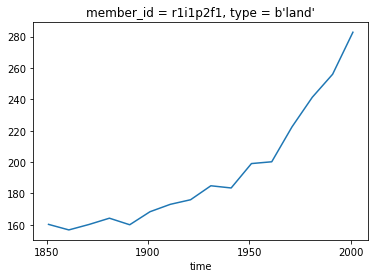

In [72]:
runoff = (ds_m1.where(ds_m1.j < 55).sum(dim=('i','j'))*3600*24*365/1e12).resample(time='10A').mean(dim='time')

pme = ((ds_pr_1ppy - ds_ev_1ppy)*ds_areacella*ds_sftlf/100*3600*24*365/1e12
).sel(lat=slice(-90,-60)).sum(dim=('lon', 'lat')
                             ).resample(time='10A').mean(dim='time')

(runoff - pme).plot()
plt.savefig('antarctic_runoff_minus_p-e_1ppy.png', bbox_inches='tight', dpi=300)

In [31]:
def sic_map(ds_exp, ds_ctl):
    fig, (axl) = plt.subplots(1,1, figsize=(12,6), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=200)))
    ( ds_exp.sel(time=slice('1921','1950')).mean(dim='time') -
     ds_ctl.mean(dim='time')).siconc.plot(ax=axl, transform=ccrs.PlateCarree(), 
                                          cbar_kwargs=dict(shrink=0.5, label=r'%'))

    for ax in [axl]:
        ax.coastlines()
        ax.add_feature(cfeature.LAND)
        ax.set_global()

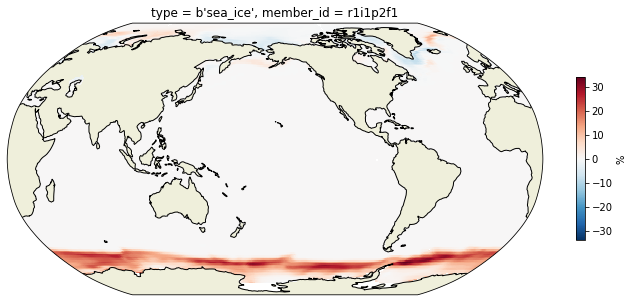

In [32]:
sic_map(ds_simon_04_rm, ds_simon_pi_rm)

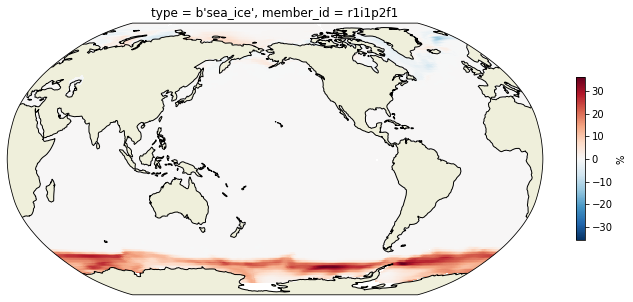

In [34]:
sic_map(ds_simon_fas_rm, ds_simon_fs_rm)
plt.savefig('sic_map_fas-fs.png', bbox_inches='tight', dpi=300)